In [63]:
from google.colab import drive
!pip install ipython-sql sqlalchemy
%load_ext sql
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [64]:
engine = create_engine('sqlite://', echo=False)


id_category = '1uLnbnZSW6A0KlkcGABzsENVsZRgy7qod'
id_customer = '1vBqhmZ1bP2Ov9kSAzE23Q3h9u0qamCAf'
id_employee = '1-D5u7fgbYWfqhd6vLBMPmeNKmXauoaV3'
id_order_detail = '1nXPBrl-ZyD77-tGideDQoaiWbMv4DpB2'
id_order = '1mBBl3F3TwUCfWJLu_-IAZSpREy_FbYBr'
id_product = '19DzwmyQnKYwav6OGWA5m4pCZldcSjIxl'
id_shipper = '1AdlOKz_liu-i-MZ-xxH6pSMy2DkqQT6-'

url_category = f'https://drive.google.com/uc?export=download&id={id_category}'
url_customer = f'https://drive.google.com/uc?export=download&id={id_customer}'
url_employee = f'https://drive.google.com/uc?export=download&id={id_employee}'
url_order_detail = f'https://drive.google.com/uc?export=download&id={id_order_detail}'
url_order = f'https://drive.google.com/uc?export=download&id={id_order}'
url_product = f'https://drive.google.com/uc?export=download&id={id_product}'
url_shipper = f'https://drive.google.com/uc?export=download&id={id_shipper}'

df_category = pd.read_csv(url_category)
df_category.to_sql('category', con=engine, if_exists='replace', index=False)

df_customer = pd.read_csv(url_customer, encoding='latin1')
df_customer.to_sql('customer', con=engine, if_exists='replace', index=False)

df_employee = pd.read_csv(url_employee)
df_employee.to_sql('employee', con=engine, if_exists='replace', index=False)

df_order_detail = pd.read_csv(url_order_detail)
df_order_detail.to_sql('order_detail', con=engine, if_exists='replace', index=False)

df_order = pd.read_csv(url_order)
df_order.to_sql('order', con=engine, if_exists='replace', index=False)

df_product = pd.read_csv(url_product, encoding='latin1')
df_product.to_sql('product', con=engine, if_exists='replace', index=False)

df_shipper = pd.read_csv(url_shipper)
df_shipper.to_sql('shipper', con=engine, if_exists='replace', index=False)

%load_ext sql
%sql sqlite://

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [65]:
general_query = """
SELECT * FROM shipper
"""

result_general = pd.read_sql_query(general_query, engine)
print(result_general)

   shipperID       companyName
0          1    Speedy Express
1          2    United Package
2          3  Federal Shipping


Query SQL dengan CTE: Tulis query SQL dasar yang memanfaatkan Common Table Expression (CTE). Gunakan CTE untuk menghitung total nilai penjualan per pelanggan terlebih dahulu (misalnya dengan menjumlahkan Quantity * UnitPrice untuk setiap pelanggan dari tabel detail pesanan dan pesanan). Kemudian, dalam query utama, tampilkan setiap pelanggan beserta total nilai penjualannya. Urutkan hasilnya mulai dari pelanggan dengan total penjualan tertinggi ke terendah.

In [66]:
query_sales = """
WITH Sales_CTE AS (
    SELECT *, (UnitPrice * Quantity) AS Sales
    FROM order_detail
)

SELECT *
FROM Sales_CTE sc
JOIN 'order' o
    USING (OrderID)
JOIN customer c
    USING (CustomerID)
JOIN product p
    USING (ProductID)
JOIN category cat
    USING (CategoryID)
JOIN employee e
    USING (EmployeeID)
JOIN shipper s
    USING (ShipperID)
JOIN order_detail od
    USING (OrderID, ProductID)
ORDER BY sc.Sales DESC
LIMIT 10
"""

result_sales = pd.read_sql_query(query_sales, engine)
print(result_sales)

   orderID  productID unitPrice quantity discount    Sales customerID  \
0    10865         38    263.50       60     0.05  15810.0      QUICK   
1    10981         38    263.50       60     0.00  15810.0      HANAR   
2    10353         38    210.80       50     0.20  10540.0      PICCO   
3    10417         38    210.80       50     0.00  10540.0      SIMOB   
4    10889         38    263.50       40     0.00  10540.0      RATTC   
5    10424         38    210.80       49     0.20  10329.2      MEREP   
6    10897         29    123.79       80     0.00   9903.2      HUNGO   
7    10372         38    210.80       40     0.25   8432.0      QUEEN   
8    10540         38    263.50       30     0.00   7905.0      QUICK   
9    10816         38    263.50       30     0.05   7905.0      GREAL   

   employeeID   orderDate requiredDate  ...  \
0           2  2015-02-02   2015-02-16  ...   
1           1  2015-03-27   2015-04-24  ...   
2           7  2013-11-13   2013-12-11  ...   
3       

Pembersihan/Transformasi Data: Lakukan pembersihan atau transformasi sederhana pada data menggunakan SQL. Contohnya, periksa apakah terdapat nilai yang NULL atau kosong pada kolom alamat atau wilayah (misalnya kolom Region di tabel pelanggan atau pesanan). Gunakan fungsi SQL seperti COALESCE untuk mengganti nilai NULL tersebut dengan teks default (misalnya "Tidak Ada") sehingga tidak ada kolom yang kosong dalam hasil query. Tunjukkan query yang Anda tulis dan jelaskan secara singkat apa yang diperbaiki atau ditransformasi.

In [67]:
print(df_category.isnull().sum())
print("--------------------------------")
print(df_customer.isnull().sum())
print("--------------------------------")
print(df_employee.isnull().sum())
print("--------------------------------")
print(df_product.isnull().sum())
print("--------------------------------")
print(df_order.isnull().sum())
print("--------------------------------")
print(df_order_detail.isnull().sum())
print("--------------------------------")
print(df_shipper.isnull().sum())

categoryID      0
categoryName    0
description     0
dtype: int64
--------------------------------
customerID      0
companyName     0
contactName     0
contactTitle    0
city            0
country         0
dtype: int64
--------------------------------
employeeID      0
employeeName    0
title           0
city            0
country         0
reportsTo       1
dtype: int64
--------------------------------
productID          0
productName        0
quantityPerUnit    0
unitPrice          0
discontinued       0
categoryID         0
dtype: int64
--------------------------------
orderID          0
customerID       0
employeeID       0
orderDate        0
requiredDate     0
shippedDate     21
shipperID        0
freight          0
dtype: int64
--------------------------------
orderID      0
productID    0
unitPrice    0
quantity     0
discount     0
dtype: int64
--------------------------------
shipperID      0
companyName    0
dtype: int64


In [68]:
## Manage null value in df_employee
df_employee.fillna({'ReportsTo': 0}, inplace=True)
df_employee.to_sql('employee', con=engine, if_exists='replace', index=False)

query_null_check = """
SELECT *
FROM employee

"""
result_null_check = pd.read_sql_query(query_null_check, engine)
print(result_null_check)

   employeeID      employeeName                 title      city country  \
0           1     Nancy Davolio  Sales Representative  New York     USA   
1           2     Andrew Fuller  Vice President Sales  New York     USA   
2           3   Janet Leverling  Sales Representative  New York     USA   
3           4  Margaret Peacock  Sales Representative  New York     USA   
4           5   Steven Buchanan         Sales Manager    London      UK   
5           6    Michael Suyama  Sales Representative    London      UK   
6           7       Robert King  Sales Representative    London      UK   
7           8    Laura Callahan         Sales Manager  New York     USA   
8           9    Anne Dodsworth  Sales Representative    London      UK   

   reportsTo  
0        8.0  
1        NaN  
2        8.0  
3        8.0  
4        2.0  
5        5.0  
6        5.0  
7        2.0  
8        5.0  


In [69]:
## Manage null value in df_order
df_order.fillna({'shippedDate': df_order['orderDate']}, inplace=True)
df_order.to_sql('order', con=engine, if_exists='replace', index=False)

query_null_check_order = """
SELECT *
FROM "order"
"""
result_null_check_order = pd.read_sql_query(query_null_check_order, engine)
print(result_null_check_order)

     orderID customerID  employeeID   orderDate requiredDate shippedDate  \
0      10248      VINET           5  2013-07-04   2013-08-01  2013-07-16   
1      10249      TOMSP           6  2013-07-05   2013-08-16  2013-07-10   
2      10250      HANAR           4  2013-07-08   2013-08-05  2013-07-12   
3      10251      VICTE           3  2013-07-08   2013-08-05  2013-07-15   
4      10252      SUPRD           4  2013-07-09   2013-08-06  2013-07-11   
..       ...        ...         ...         ...          ...         ...   
825    11073      PERIC           2  2015-05-05   2015-06-02  2015-05-05   
826    11074      SIMOB           7  2015-05-06   2015-06-03  2015-05-06   
827    11075      RICSU           8  2015-05-06   2015-06-03  2015-05-06   
828    11076      BONAP           4  2015-05-06   2015-06-03  2015-05-06   
829    11077      RATTC           1  2015-05-06   2015-06-03  2015-05-06   

     shipperID  freight  
0            3    32.38  
1            1    11.61  
2        

In [70]:
print(df_category.isnull().sum())
print("--------------------------------")
print(df_customer.isnull().sum())
print("--------------------------------")
print(df_employee.isnull().sum())
print("--------------------------------")
print(df_product.isnull().sum())
print("--------------------------------")
print(df_order.isnull().sum())
print("--------------------------------")
print(df_order_detail.isnull().sum())
print("--------------------------------")
print(df_shipper.isnull().sum())

categoryID      0
categoryName    0
description     0
dtype: int64
--------------------------------
customerID      0
companyName     0
contactName     0
contactTitle    0
city            0
country         0
dtype: int64
--------------------------------
employeeID      0
employeeName    0
title           0
city            0
country         0
reportsTo       1
dtype: int64
--------------------------------
productID          0
productName        0
quantityPerUnit    0
unitPrice          0
discontinued       0
categoryID         0
dtype: int64
--------------------------------
orderID         0
customerID      0
employeeID      0
orderDate       0
requiredDate    0
shippedDate     0
shipperID       0
freight         0
dtype: int64
--------------------------------
orderID      0
productID    0
unitPrice    0
quantity     0
discount     0
dtype: int64
--------------------------------
shipperID      0
companyName    0
dtype: int64


Analisis Statistik Dasar: Hitunglah beberapa metrik statistik dasar dari data penjualan:

 - Total jumlah transaksi (jumlah order keseluruhan yang tercatat dalam dataset).

 - Total pendapatan penjualan (misalnya dengan menjumlahkan nilai Quantity * UnitPrice dari semua detail pesanan sebagai total revenue).

 - Rata-rata nilai penjualan per order (Average Order Value – hitung total pendapatan penjualan dibagi jumlah order, atau gunakan metode lain untuk mendapatkan     rata-rata per pesanan).

 - Total pendapatan per kategori produk – kelompokkan penjualan berdasarkan kategori produk dan hitung total pendapatan untuk setiap kategori. Tampilkan daftar kategori beserta total pendapatannya masing-masing.

In [83]:
# Total Order

query_total_order = """
SELECT COUNT(OrderID) AS Total_Orders
FROM "order"
"""

result_total_order = pd.read_sql_query(query_total_order, engine)
print(result_total_order)

# Total Revenue
query_total_revenue = """
SELECT SUM(od.UnitPrice * od.Quantity) AS Total_Revenue
FROM order_detail od
JOIN "order" o
    USING (OrderID)
"""

result_total_revenue = pd.read_sql_query(query_total_revenue, engine)
print(result_total_revenue)

# Average Revenue per Order
query_avg_revenue_per_order = """
SELECT AVG(OrderRevenue) AS Avg_Revenue_Per_Order
FROM (
    SELECT o.OrderID, SUM(od.UnitPrice * od.Quantity) AS OrderRevenue
    FROM "order" o
    JOIN order_detail od
        USING (OrderID)
    GROUP BY o.OrderID
) subquery
"""

result_avg_revenue_per_order = pd.read_sql_query(query_avg_revenue_per_order, engine)
print(result_avg_revenue_per_order)

# Total Revenue by Category
query_revenue_by_category = """
SELECT cat.CategoryName, SUM(od.UnitPrice * od.Quantity) AS Total_Revenue
FROM order_detail od
JOIN product p
    USING (ProductID)
JOIN category cat
    USING (CategoryID)
GROUP BY cat.CategoryName
ORDER BY Total_Revenue DESC
"""

result_revenue_by_category = pd.read_sql_query(query_revenue_by_category, engine)
print(result_revenue_by_category)

# Revenue Year over Year (YoY)
query_revenue_yoy = """
SELECT
    STRFTIME('%Y', o.OrderDate) AS OrderYear,
    SUM(od.UnitPrice * od.Quantity) AS Total_Revenue
FROM "order" o
JOIN order_detail od
    USING (OrderID)
GROUP BY OrderYear
ORDER BY OrderYear
"""

result_revenue_yoy = pd.read_sql_query(query_revenue_yoy, engine)
print(result_revenue_yoy)

   Total_Orders
0           830
   Total_Revenue
0     1354458.59
   Avg_Revenue_Per_Order
0            1631.877819
       categoryName  Total_Revenue
0         Beverages      286526.95
1    Dairy Products      251330.50
2    Meat & Poultry      178188.80
3       Confections      177099.10
4           Seafood      141623.09
5        Condiments      113694.75
6           Produce      105268.60
7  Grains & Cereals      100726.80
  OrderYear  Total_Revenue
0      2013      226298.50
1      2014      658388.75
2      2015      469771.34


Visualisasi Data dengan Python: Gunakan Python (library Pandas dan Matplotlib/Seaborn) untuk membuat visualisasi dari hasil analisis. Contohnya, buatlah grafik batang (bar chart) yang menampilkan total pendapatan penjualan untuk setiap kategori produk (berdasarkan hasil di poin 3 di atas). Pastikan grafik tersebut memiliki judul yang jelas, dengan label pada sumbu-x (kategori produk) dan sumbu-y (total penjualan), sehingga mudah dibaca.

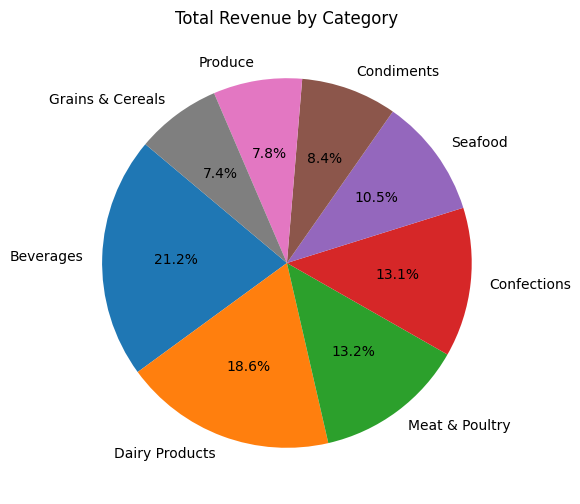

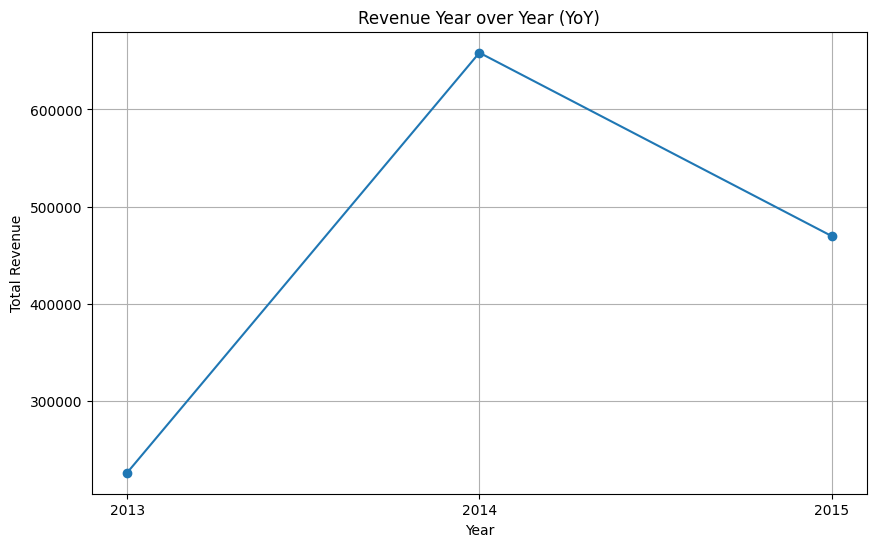

In [84]:
# Visualization category revenue Paie Chart
plt.figure(figsize=(10, 6))
plt.pie(result_revenue_by_category['Total_Revenue'], labels=result_revenue_by_category['categoryName'], autopct='%1.1f%%', startangle=140)
plt.title('Total Revenue by Category')
plt.show()

# Visualization Revenue Year over Year (YoY) Line Chart
plt.figure(figsize=(10, 6))
plt.plot(result_revenue_yoy['OrderYear'], result_revenue_yoy['Total_Revenue'], marker='o')
plt.title('Revenue Year over Year (YoY)')
plt.xlabel('Year')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.show()

**INSIGHT**

1. Tren Penjualan & Performa Tahunan (Yearly Performance)
    - Ledakan Pertumbuhan 2014: Terjadi lonjakan performa yang sangat signifikan pada tahun 2014, di mana pendapatan naik hampir 3x lipat (191%) dibandingkan tahun 2013 (dari 226k menjadi 658k). Ini mengindikasikan strategi pasar atau ekspansi yang sangat sukses di tahun tersebut.

    - Penurunan di 2015: Terjadi penurunan pendapatan sekitar -28% di tahun 2015 (turun ke 469k) dibandingkan puncak performa di 2014 (Actionable: Perlu diinvestigasi apakah data 2015 ini adalah data satu tahun penuh (full year) atau data berjalan (YTD). Jika full year, maka ada masalah retensi pelanggan atau suplai barang yang serius).

2. Analisis Kategori Produk (Product Portfolio)
    - Dominasi "Beverages" & "Dairy": Dua kategori ini adalah tulang punggung perusahaan (Beverages (21.2%) dan Dairy Products (18.6%) jika digabungkan menyumbang hampir 40% dari total pendapatan. Kehilangan suplai atau pelanggan di dua sektor ini akan berdampak fatal bagi bisnis).

    - Peluang di Kategori Menengah: Meat & Poultry dan Confections memiliki kontribusi yang sehat (~13%). Potensi cross-selling (penjualan silang) bisa dilakukan di sini, misalnya menawarkan Beverages kepada pembeli Confections.

    - Kategori Terendah: Grains & Cereals dan Produce berada di posisi terbawah. Perlu dievaluasi apakah margin keuntungannya cukup besar untuk dipertahankan, atau apakah perlu strategi bundling (paket hemat) untuk mendongkrak volume penjualannya.

3. Isu Kualitas Data (Data Quality Issues)
    - Kolom shippedDate di table Order ada yang NULL
    - Kolom reportsTo di table Employee ada beberapa data yang NULL


